# Estrategia de inversión con base en medias moviles

**Estadística Aplicada**

**Edwin Javier Hernández Rodríguez**

**Sesion 15- 21 Marzo 2023 (primavera)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importar las librerias

import yfinance as yf

In [3]:
## nombre en bolsa de la empresa
ticker = 'AMZN'

In [4]:
amazon = yf.download(ticker,
                    start='2019-01-01',
                    end='2023-03-17',
                    progress=False)

In [5]:
amazon

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02 00:00:00-05:00,73.260002,77.667999,73.046501,76.956497,76.956497,159662000
2019-01-03 00:00:00-05:00,76.000504,76.900002,74.855499,75.014000,75.014000,139512000
2019-01-04 00:00:00-05:00,76.500000,79.699997,75.915497,78.769501,78.769501,183652000
2019-01-07 00:00:00-05:00,80.115501,81.727997,79.459503,81.475502,81.475502,159864000
2019-01-08 00:00:00-05:00,83.234497,83.830498,80.830498,82.829002,82.829002,177628000
...,...,...,...,...,...,...
2023-03-10 00:00:00-05:00,92.669998,93.570000,90.250000,90.730003,90.730003,69747500
2023-03-13 00:00:00-04:00,89.970001,94.019997,88.120003,92.430000,92.430000,72397100
2023-03-14 00:00:00-04:00,93.830002,95.070000,92.709999,94.879997,94.879997,60912700


In [6]:
amazon = amazon[['Adj Close']]

In [7]:
amazon = amazon.rename(columns={'Adj Close': 'precio_cierre'})

In [8]:
#promedio movil a 10 días (señal de corto plazo)
amazon['MA-10'] = amazon['precio_cierre'].rolling(window=10).mean()
#promedio movil a 60 días (señal de largo plazo)
amazon['MA-60'] = amazon['precio_cierre'].rolling(window=60).mean()

In [9]:
amazon['invertir'] = amazon['MA-10'] > amazon['MA-60']

In [10]:
#SEÑAL
#Crear una columna adicional que indique si se debe comprar o vender
amazon['Signal'] = 0
amazon.loc[amazon["invertir"], "Signal"] = 1 #comprar / mantener
amazon.loc[~amazon["invertir"], "Signal"] = -1 #vender / no comprar

In [14]:
#vamos a verificar cual sería el rendimiento de esta estrategia de inversión

$rendimiento = \frac{P_t - P_{t-1}}{P_{t-1}} $

In [11]:
#rendimiento de la acción amazon
amazon['rendimiento'] = amazon['precio_cierre'].pct_change()

In [16]:
#grafica MA-10 y MA-60

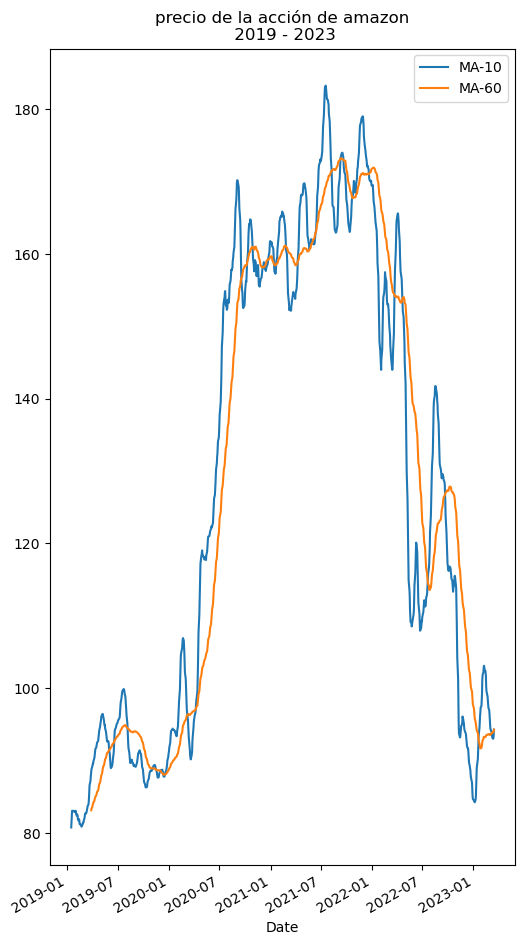

In [12]:
#grafica de la acción
amazon[['MA-10', 'MA-60']].plot(figsize=(6,12))
plt.title('precio de la acción de amazon\n 2019 - 2023')
plt.show()

In [14]:
amazon

,precio_cierre,MA-10,MA-60,invertir,Signal,rendimiento
Date,,,,,,
2019-01-02 00:00:00-05:00,76.956497,NaN,NaN,False,-1,NaN
2019-01-03 00:00:00-05:00,75.014000,NaN,NaN,False,-1,-0.025241
2019-01-04 00:00:00-05:00,78.769501,NaN,NaN,False,-1,0.050064
2019-01-07 00:00:00-05:00,81.475502,NaN,NaN,False,-1,0.034353
2019-01-08 00:00:00-05:00,82.829002,NaN,NaN,False,-1,0.016612
...,...,...,...,...,...,...
2023-03-10 00:00:00-05:00,90.730003,93.139001,93.871334,False,-1,-0.016477
2023-03-13 00:00:00-04:00,92.430000,93.006001,93.870334,False,-1,0.018737
2023-03-14 00:00:00-04:00,94.879997,93.071000,93.925334,False,-1,0.026507


In [15]:
#rendimiento total del periodo
amazon['rendimiento'].sum().round(3)

0.534

In [16]:
amazon.query('Signal==-1')['rendimiento'].sum()

0.33488667181020637